

# Project: Population Growth Analysis in East African Countries in 1985, 1995, 2005 and 2015

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data selected for this project constitutes of population data of the entire world downloaded from Gapminder. For this project only African countries were anaysed to determine how new births,baby per woman and child mortality affect the overall population growth in the continent in intervals of 10 years from the year 1985 to 2015. This information derived from this analysis could help inform decisions on how to improve maternity and new borns health care. The questions this analysis seeks to answer include:
<ul>
<li> What is the general trend of each of the indicators over the years?</li>
<li> How does child mortality affect the population growth?</li>
<li> What is the relationship between new births and child mortality rate?</li>
<li> Which countries experienced the highest and lowest child mortality rates?</li>
<li> Which years and regions experienced the highest population growth?</li>
</ul>

In [1]:
# Packages to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties
The population growth data entails the exponential annual population growth rate from the mid previous year to the year of report expressed as a percentage. The columns include country and the different years. In this section, the datasets are loaded and their general properties analyzed.

In [2]:
#1.Load data
#population growth
pop_growth = pd.read_csv('D:\Data Analytics\Project_1\Data_sets\population_growth_annual_percent.csv')
pop_growth.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,2.24,1.43,0.824,0.58,0.574,0.6,0.591,0.572,0.61,...,0.378,0.503,0.583,0.591,0.541,0.503,0.472,0.459,0.437,0.428
1,Afghanistan,1.9,1.97,2.03,2.09,2.15,2.17,2.19,2.25,2.38,...,3.14,3.41,3.49,3.36,3.08,2.78,2.55,2.38,2.31,2.3
2,Angola,1.39,1.38,1.26,0.974,0.618,0.186,−0.119,−0.0427,0.548,...,3.63,3.6,3.55,3.5,3.44,3.38,3.32,3.28,3.24,3.22
3,Albania,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,2.9,...,−0.269,−0.165,−0.183,−0.207,−0.291,−0.16,−0.092,−0.247,−0.426,−0.574
4,Andorra,6.97,6.73,6.47,6.25,5.98,5.78,5.52,5.28,5.19,...,−0.839,−1.59,−2.03,−1.95,−1.55,−0.899,−0.386,0.0143,0.179,0.154


In [3]:
# 2.Select East African countries only and the years 1985,1995,2005,2015
pop_growth_af = pop_growth.query("country in ['Djibouti','Seychelles','Comoros','Tanzania','Kenya','Uganda','Sudan','Eritrea','Somalia','Zimbabwe','Rwanda','Mauritius','Burundi','Ethiopia','South Sudan']")
pop_growth_af = pop_growth_af.filter(items=['country','1985','1995','2005','2015'])
pop_growth_af

,country,1985,1995,2005,2015
13,Burundi,2.77,1.48,3.22,3.16
42,Comoros,2.82,2.8,2.38,2.35
50,Djibouti,4.71,1.28,1.5,1.69
57,Eritrea,2.92,−0.643,3.85,NaN
60,Ethiopia,3.19,3.33,2.8,2.76
99,Kenya,3.75,2.99,2.74,2.49
136,Mauritius,0.817,0.86,0.592,0.132
167,Rwanda,4.05,−1.69,1.82,2.54
169,Sudan,3.26,3.19,2.4,2.41
176,Somalia,0.511,1.6,3.08,2.75


In [4]:
#2.Check for null values
pop_growth_af.isnull().sum()

country    0
1985       0
1995       0
2005       0
2015       1
dtype: int64

In [7]:
#3.Fill na values
pop_growth_af['2015'].fillna(3.85,inplace=True)

The new births data is an estimated total number of new births in a given year for diffrent countries based on crude birth rate data from UN population Division and Gapminder foundation.

In [6]:
#Load new_births data
new_birth = pd.read_csv("D:\\Data Analytics\\Project_1\\Data_sets\\new_births_total_number_estimated.csv")
new_birth.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,158k,158k,158k,158k,158k,158k,158k,158k,158k,...,1.09M,1.1M,1.1M,1.1M,1.1M,1.09M,1.09M,1.08M,1.08M,1.08M


In [8]:
#Select East African Countries and years 1985,1995,2005,2015
new_births_af = new_birth.query("country in ['Djibouti','Seychelles','Comoros','Tanzania','Kenya','Uganda','Sudan','Eritrea','Somalia','Zimbabwe','Rwanda','Mauritius','Burundi','Ethiopia','South Sudan']")
new_births_af = new_births_af.filter(items=['country','1985','1995','2005','2015'])
new_births_af

,country,1985,1995,2005,2015
10,Burundi,249k,282k,345k,488k
38,Comoros,16.5k,18.9k,22.7k,26.4k
45,Djibouti,17.9k,23.9k,22.3k,22k
51,Eritrea,127k,124k,157k,175k
55,Ethiopia,2M,2.65M,2.97M,3.18M
93,Kenya,928k,1.05M,1.36M,1.57M
124,Mauritius,20.6k,21.7k,17.9k,13.9k
155,Rwanda,326k,289k,352k,363k
157,Sudan,733k,1M,1.2M,1.32M
163,Somalia,290k,325k,396k,471k


In [10]:
#Check for null values
new_births_af.isnull().sum()

country    0
1985       0
1995       0
2005       0
2015       0
dtype: int64

The Children per woman total fertility data contains the rate of fertility of women with respect to how many children the can bare at a specific age

In [11]:
#Load Baby per woman total fertility data
baby_perwoman = pd.read_csv('D:\Data Analytics\Project_1\Data_sets\children_per_woman_total_fertility.csv')
baby_perwoman.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83


In [12]:
#Select East African Countries and years 1985,1995,2005,2015
baby_perwoman_af = baby_perwoman.query("country in ['Djibouti','Seychelles','Comoros','Tanzania','Kenya','Uganda','Sudan','Eritrea','Somalia','Zimbabwe','Rwanda','Mauritius','Burundi','Ethiopia','South Sudan']")
baby_perwoman_af = baby_perwoman_af.filter(items=['country','1985','1995','2005','2015'])
baby_perwoman_af.head()

,country,1985,1995,2005,2015
12,Burundi,7.49,7.29,6.69,5.78
40,Comoros,6.58,5.25,5.22,4.45
47,Djibouti,6.22,5.35,3.87,2.91
53,Eritrea,6.64,5.91,4.94,4.21
57,Ethiopia,7.44,7.00,5.69,4.32


The child mortality rate is the number of children who die per each 1000 live births.

In [13]:
#Load Child mortality rate data
child_mort = pd.read_csv('D:\Data Analytics\Project_1\Data_sets\child_mortality_0_5_year_olds_dying_per_1000_born.csv')
child_mort.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.6,12.4,12.2,12.0,11.8,11.6,11.5,11.3,11.1,11.1


In [14]:
#Select East African Countries and years 1985,1995,2005,2015
child_mort_af = child_mort.query("country in ['Djibouti','Seychelles','Comoros','Tanzania','Kenya','Uganda','Sudan','Eritrea','Somalia','Zimbabwe','Rwanda','Mauritius','Burundi','Ethiopia','South Sudan']")
child_mort_af = child_mort_af.filter(items=['country','1985','1995','2005','2015'])
child_mort_af.head()

,country,1985,1995,2005,2015
11,Burundi,176.0,178.0,125.0,67.0
38,Comoros,147.0,108.0,99.3,74.9
45,Djibouti,134.0,110.0,89.0,65.3
52,Eritrea,177.0,115.0,67.8,46.5
55,Ethiopia,222.0,173.0,110.0,63.5


In [15]:
#5.Rename the columns of the datasets to differentiate the datasets columns once they are merged together.
pg_df=pop_growth_af.add_suffix('_pg')
nb_df=new_births_af.add_suffix('_nb')
bpw_df=baby_perwoman_af.add_suffix('_bpw')
cm_df=child_mort_af.add_suffix('_cm')

In [16]:
#Rename columns. The country column is renamed to a common name so that it can be a common column in all datasets during merging.
nb_df.rename(columns={'country_nb':'Country'},inplace=True)
bpw_df.rename(columns={'country_bpw':'Country'},inplace=True)
cm_df.rename(columns={'country_cm':'Country'},inplace=True)
pg_df.rename(columns={'country_pg':'Country'},inplace=True)
pg_df.head

<bound method NDFrame.head of          Country 1985_pg 1995_pg 2005_pg 2015_pg
13       Burundi    2.77    1.48    3.22    3.16
42       Comoros    2.82     2.8    2.38    2.35
50      Djibouti    4.71    1.28     1.5    1.69
57       Eritrea    2.92  −0.643    3.85    3.85
60      Ethiopia    3.19    3.33     2.8    2.76
99         Kenya    3.75    2.99    2.74    2.49
136    Mauritius   0.817    0.86   0.592   0.132
167       Rwanda    4.05   −1.69    1.82    2.54
169        Sudan    3.26    3.19     2.4    2.41
176      Somalia   0.511     1.6    3.08    2.75
178  South Sudan    2.41   0.131    4.37    1.51
186   Seychelles   0.811    1.47   0.463    2.23
200     Tanzania    3.06    2.93    2.82       3
201       Uganda    3.33    3.08    3.17     3.5
216     Zimbabwe    3.62    1.31   0.471    1.66>

In [17]:
#6.Set Country as the key for each dataset index
pg_df.set_index('Country')
nb_df.set_index('Country')
bpw_df.set_index('Country')
cm_df.set_index('Country')

,1985_cm,1995_cm,2005_cm,2015_cm
Country,,,,
Burundi,176.0,178.0,125.0,67.0
Comoros,147.0,108.0,99.3,74.9
Djibouti,134.0,110.0,89.0,65.3
Eritrea,177.0,115.0,67.8,46.5
Ethiopia,222.0,173.0,110.0,63.5
Kenya,98.0,119.0,79.3,46.3
Mauritius,28.4,22.2,15.7,14.3
Rwanda,161.0,244.0,110.0,41.3
Sudan,141.0,120.0,88.2,66.3


### Data Cleaning
>The different datasets will be merged to one data frame to enable evaluation of the relationships of the different variable. The first step checks for the datatypes of the four datasets. The columns in children per woman and newbirths datasets were found to be objects hence they needed to be converted to float to be uniform with the other datasets. The datasets were then merged using the .merge method and the new data checked to see if it was well merged and to check for any missing values.


In [18]:
# 1.Check the data types
cm_df.dtypes

Country     object
1985_cm    float64
1995_cm    float64
2005_cm    float64
2015_cm    float64
dtype: object

In [19]:
bpw_df.dtypes

Country      object
1985_bpw    float64
1995_bpw    float64
2005_bpw    float64
2015_bpw    float64
dtype: object

In [20]:
nb_df.dtypes

Country    object
1985_nb    object
1995_nb    object
2005_nb    object
2015_nb    object
dtype: object

In [21]:
pg_df.dtypes

Country    object
1985_pg    object
1995_pg    object
2005_pg    object
2015_pg    object
dtype: object

In [22]:
#2.Replace the negative values in the population growth data frame to enable conversion to float.
pg_df['1995_pg'] = pg_df['1995_pg'].apply(lambda x: x.strip().replace('−', ''))
pg_df['1995_pg']
pg_df['2005_pg'] = pg_df['2005_pg'].apply(lambda x: x.strip().replace('−', ''))
pg_df['2005_pg']

13      3.22
42      2.38
50       1.5
57      3.85
60       2.8
99      2.74
136    0.592
167     1.82
169      2.4
176     3.08
178     4.37
186    0.463
200     2.82
201     3.17
216    0.471
Name: 2005_pg, dtype: object

In [23]:
# 3. Convert datatype to float
pg_df['1985_pg']=pg_df['1985_pg'].astype(float)
pg_df['1995_pg']=pg_df['1995_pg'].astype(float)
pg_df['2005_pg']=pg_df['2005_pg'].astype(float)
pg_df['2015_pg']=pg_df['2015_pg'].astype(float)

In [24]:
pg_df.dtypes

Country     object
1985_pg    float64
1995_pg    float64
2005_pg    float64
2015_pg    float64
dtype: object

In [25]:
#5.Replace the symbol k for thousand and M for Million
nb_df['1985_nb'] = nb_df['1985_nb'].apply(lambda x: x.strip().replace('k','000' ))
nb_df['1995_nb'] = nb_df['1995_nb'].apply(lambda x: x.strip().replace('k', '000'))
nb_df['2005_nb'] = nb_df['2005_nb'].apply(lambda x: x.strip().replace('k', '000'))
nb_df['2015_nb'] = nb_df['2015_nb'].apply(lambda x: x.strip().replace('k', '000'))
nb_df['1985_nb'] = nb_df['1985_nb'].apply(lambda x: x.strip().replace('M', '0000'))
nb_df['1995_nb'] = nb_df['1995_nb'].apply(lambda x: x.strip().replace('M', '0000'))
nb_df['2005_nb'] = nb_df['2005_nb'].apply(lambda x: x.strip().replace('M', '0000'))
nb_df['2015_nb'] = nb_df['2015_nb'].apply(lambda x: x.strip().replace('M', '0000'))
nb_df

,Country,1985_nb,1995_nb,2005_nb,2015_nb
10,Burundi,249000,282000,345000,488000
38,Comoros,16.5000,18.9000,22.7000,26.4000
45,Djibouti,17.9000,23.9000,22.3000,22000
51,Eritrea,127000,124000,157000,175000
55,Ethiopia,20000,2.650000,2.970000,3.180000
93,Kenya,928000,1.050000,1.360000,1.570000
124,Mauritius,20.6000,21.7000,17.9000,13.9000
155,Rwanda,326000,289000,352000,363000
157,Sudan,733000,10000,1.20000,1.320000
163,Somalia,290000,325000,396000,471000


In [26]:
#6.Convert to float
nb_df['1985_nb']=nb_df['1985_nb'].astype(float)
nb_df['1995_nb']=nb_df['1995_nb'].astype(float)
nb_df['2005_nb']=nb_df['2005_nb'].astype(float)
nb_df['2015_nb']=nb_df['2015_nb'].astype(float)
nb_df.dtypes


Country     object
1985_nb    float64
1995_nb    float64
2005_nb    float64
2015_nb    float64
dtype: object

In [25]:
# 7.Replace the decimal values to the correct values in the new births dataframe. This was due to the fact that not all values 
# converted to the correct formats and hence needed to be corrected to avoid any errors in their analysis.
nb_df=nb_df.replace({16.5:16500, 18.90:18900,22.70:22700,26.40:26400})
nb_df=nb_df.replace({17.9:17900, 23.90:23900,22.30:22300})
nb_df=nb_df.replace({2.65:2650000, 2.97:2970000,3.18:3180000,1.05:1050000,1.36:1360000,1.57:1570000})
nb_df=nb_df.replace({20.6:20600, 21.70:21700,13.90:13900,1.20:1200000,1.32:1320000})
nb_df=nb_df.replace({1.26:1260000, 1.66:1660000,2.06:2060000,1.01:1010000,1.67:1670000})
nb_df

,Country,1985_nb,1995_nb,2005_nb,2015_nb
10,Burundi,249000.0,282000.0,345000.0,488000.0
38,Comoros,16500.0,18900.0,22700.0,26400.0
45,Djibouti,17900.0,23900.0,22300.0,22000.0
51,Eritrea,127000.0,124000.0,157000.0,175000.0
55,Ethiopia,20000.0,2650000.0,2970000.0,3180000.0
93,Kenya,928000.0,1050000.0,1360000.0,1570000.0
124,Mauritius,20600.0,21700.0,17900.0,13900.0
155,Rwanda,326000.0,289000.0,352000.0,363000.0
157,Sudan,733000.0,10000.0,1200000.0,1320000.0
163,Somalia,290000.0,325000.0,396000.0,471000.0


In [27]:
# 8.Merge the datasets
datasets = [pg_df,cm_df,bpw_df]
pop_af = pd.merge(cm_df,bpw_df,on = 'Country', how = 'left')
pop_af = pd.merge(pop_af,pg_df, on ='Country', how = 'left')
pop_af = pd.merge(pop_af,nb_df, on ='Country', how = 'left')
pop_af

,Country,1985_cm,1995_cm,2005_cm,2015_cm,1985_bpw,1995_bpw,2005_bpw,2015_bpw,1985_pg,1995_pg,2005_pg,2015_pg,1985_nb,1995_nb,2005_nb,2015_nb
0,Burundi,176.0,178.0,125.0,67.0,7.49,7.29,6.69,5.78,2.770,1.480,3.220,3.160,249000.0,282000.00,345000.00,488000.00
1,Comoros,147.0,108.0,99.3,74.9,6.58,5.25,5.22,4.45,2.820,2.800,2.380,2.350,16.5,18.90,22.70,26.40
2,Djibouti,134.0,110.0,89.0,65.3,6.22,5.35,3.87,2.91,4.710,1.280,1.500,1.690,17.9,23.90,22.30,22000.00
3,Eritrea,177.0,115.0,67.8,46.5,6.64,5.91,4.94,4.21,2.920,0.643,3.850,3.850,127000.0,124000.00,157000.00,175000.00
4,Ethiopia,222.0,173.0,110.0,63.5,7.44,7.00,5.69,4.32,3.190,3.330,2.800,2.760,20000.0,2.65,2.97,3.18
5,Kenya,98.0,119.0,79.3,46.3,6.91,5.46,4.84,3.92,3.750,2.990,2.740,2.490,928000.0,1.05,1.36,1.57
6,Mauritius,28.4,22.2,15.7,14.3,2.25,2.14,1.82,1.44,0.817,0.860,0.592,0.132,20.6,21.70,17.90,13.90
7,Rwanda,161.0,244.0,110.0,41.3,8.18,6.17,5.14,3.97,4.050,1.690,1.820,2.540,326000.0,289000.00,352000.00,363000.00
8,Sudan,141.0,120.0,88.2,66.3,6.47,5.83,5.14,4.60,3.260,3.190,2.400,2.410,733000.0,10000.00,1.20,1.32
9,Somalia,191.0,172.0,172.0,133.0,7.15,7.65,7.31,6.37,0.511,1.600,3.080,2.750,290000.0,325000.00,396000.00,471000.00


In [28]:
# 9.Explore the data
pop_af.describe()

,1985_cm,1995_cm,2005_cm,2015_cm,1985_bpw,1995_bpw,2005_bpw,2015_bpw,1985_pg,1995_pg,2005_pg,2015_pg,1985_nb,1995_nb,2005_nb,2015_nb
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,148.566667,134.966667,94.353333,59.993333,6.341333,5.618667,4.994667,4.256000,2.801933,1.918933,2.378400,2.402133,335255.000000,112641.364667,135585.427333,167045.340000
std,68.816004,63.614527,41.049062,29.387253,1.571132,1.616702,1.518989,1.307865,1.218705,1.041082,1.196566,0.908254,349094.482559,150954.403807,181581.898852,222604.786493
min,20.700000,14.300000,13.800000,14.300000,2.250000,2.140000,1.820000,1.440000,0.511000,0.131000,0.463000,0.132000,16.500000,1.010000,1.200000,1.320000
25%,116.000000,109.000000,83.750000,46.400000,6.345000,5.300000,4.415000,3.880000,2.590000,1.295000,1.660000,1.960000,10885.000000,10.775000,2.315000,2.620000
50%,161.000000,120.000000,99.300000,59.100000,6.640000,5.880000,5.140000,4.320000,3.060000,1.600000,2.740000,2.490000,257000.000000,1550.000000,22.700000,1630.000000
75%,184.000000,172.500000,110.000000,66.650000,7.125000,6.775000,5.745000,5.010000,3.475000,2.960000,3.125000,2.880000,551500.000000,272500.000000,338000.000000,404500.000000
max,276.000000,244.000000,172.000000,133.000000,8.180000,7.650000,7.310000,6.370000,4.710000,3.330000,4.370000,3.850000,994000.000000,395000.000000,451000.000000,539000.000000


In [29]:
pop_af.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   15 non-null     object 
 1   1985_cm   15 non-null     float64
 2   1995_cm   15 non-null     float64
 3   2005_cm   15 non-null     float64
 4   2015_cm   15 non-null     float64
 5   1985_bpw  15 non-null     float64
 6   1995_bpw  15 non-null     float64
 7   2005_bpw  15 non-null     float64
 8   2015_bpw  15 non-null     float64
 9   1985_pg   15 non-null     float64
 10  1995_pg   15 non-null     float64
 11  2005_pg   15 non-null     float64
 12  2015_pg   15 non-null     float64
 13  1985_nb   15 non-null     float64
 14  1995_nb   15 non-null     float64
 15  2005_nb   15 non-null     float64
 16  2015_nb   15 non-null     float64
dtypes: float64(16), object(1)
memory usage: 2.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis



### 1. What is the general trend of each of the indicators over the years?

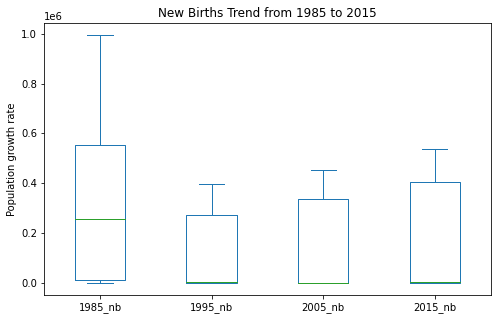

In [32]:
#Boxplots were plotted to show the distributions of each of the variables selected.
# New births trends
def myboxplot(a,b):
    a.plot(kind = 'box',figsize=(8,5),
           title= b + ' Trend from 1985 to 2015',
           xlabel='Years',
           ylabel='Population growth rate');

myboxplot(nb_df,'New Births')

There was a general increase in the number of new births from 1985 to 2015.

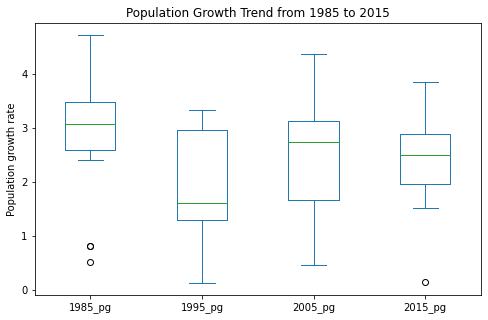

In [33]:
#Population growth trend
myboxplot(pg_df,'Population Growth')


There was a high growth rate in 1985 which reduced in 1995. In 2005 and 2015 the rate is relatively at the same level.

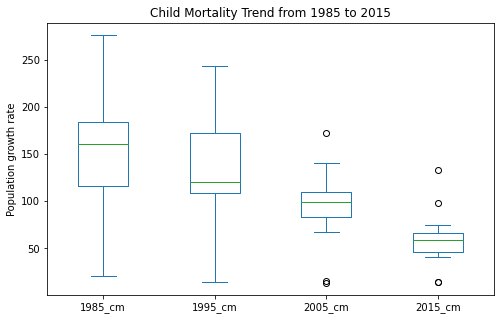

In [34]:
#Child mortality
myboxplot(cm_df,'Child Mortality')


There has been a significant reduction in child mortality rate since 1985 to 2015.

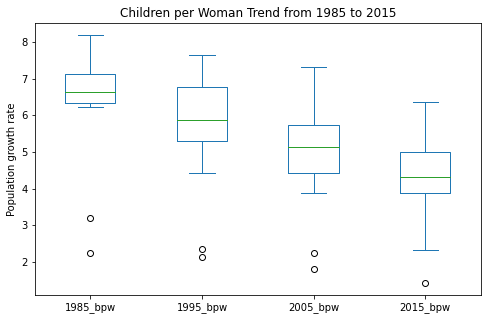

In [35]:
#Baby per woman
myboxplot(bpw_df,'Children per Woman')

The number of childen per woman has been decreasing over the years.

### 2. How does child mortality affect the population growth?

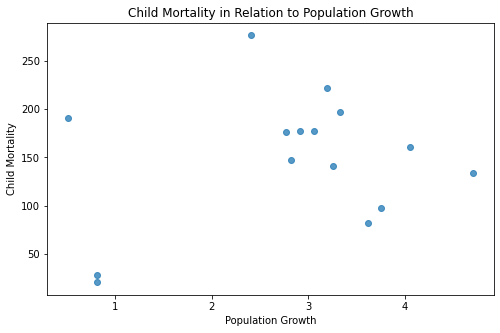

In [39]:
#A scatter plot is used to show the relationships.
# 1. 1985
plt.figure(figsize=(8,5))
plt.scatter(pop_af['1985_pg'],pop_af['1985_cm'], alpha = 0.75)
plt.title('Child Mortality in Relation to Population Growth')
plt.xlabel('Population Growth')
plt.ylabel('Child Mortality');


Child mortality appears to decrease with increase in population growth though it is a weak correlation.

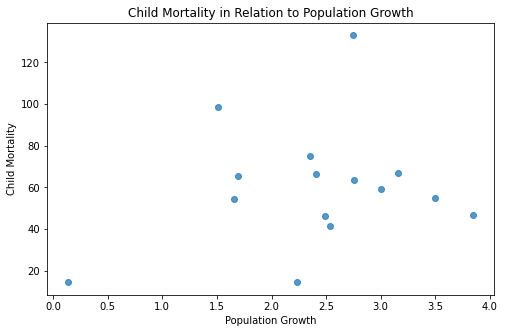

In [40]:
# 2015
plt.figure(figsize=(8,5))
plt.scatter(pop_af['2015_pg'],pop_af['2015_cm'], alpha = 0.75)
plt.title('Child Mortality in Relation to Population Growth')
plt.xlabel('Population Growth')
plt.ylabel('Child Mortality');


### 3.  What is the relationship between new births and child mortality rate?

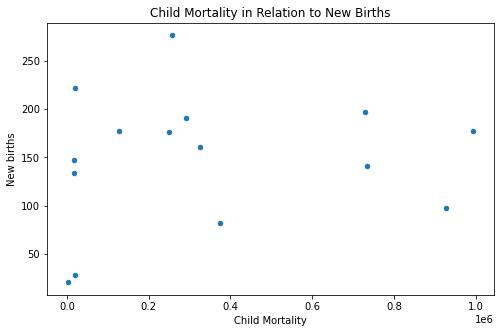

In [214]:
#Scatter plots were used to show relationship.
pop_af.plot('1985_nb','1985_cm',kind='scatter',title='Child Mortality in Relation to New Births',figsize=(8,5),ylabel='New births',xlabel='Child Mortality');

There is no clear pattern observed hence the two variables are not correlated.

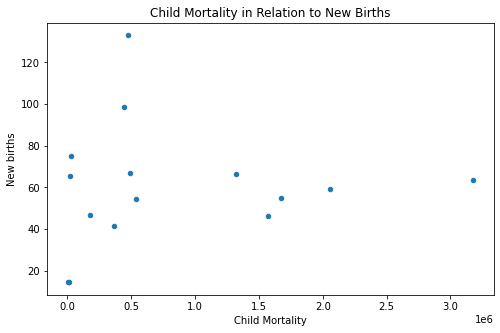

In [215]:
pop_af.plot('2015_nb','2015_cm',kind='scatter',title='Child Mortality in Relation to New Births',figsize=(8,5),ylabel='New births',xlabel='Child Mortality');

### 4. Which countries experienced the highest and lowest child mortality rates?

In [172]:
# Bar plots were used to visualize the mortality rates for the years 2015 and 1985.
cm_df.describe

,1985_cm,1995_cm,2005_cm,2015_cm
count,15.000000,15.000000,15.000000,15.000000
mean,148.566667,134.966667,94.353333,59.993333
std,68.816004,63.614527,41.049062,29.387253
min,20.700000,14.300000,13.800000,14.300000
25%,116.000000,109.000000,83.750000,46.400000
50%,161.000000,120.000000,99.300000,59.100000
75%,184.000000,172.500000,110.000000,66.650000
max,276.000000,244.000000,172.000000,133.000000


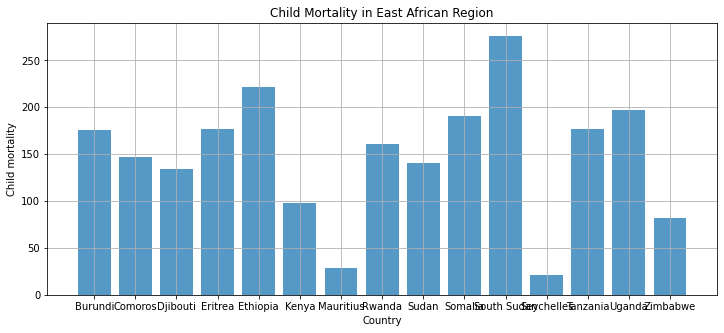

In [42]:
# 1985
plt.figure(figsize=(12,5))
plt.bar(pop_af.Country,pop_af['1985_cm'], alpha =0.75)
plt.xlabel('Country')
plt.ylabel('Child mortality')
plt.title('Child Mortality in East African Region')
plt.grid(True)


In 1985 South Sudan experienced the highest child mortality rate while Sychelles the lowest.

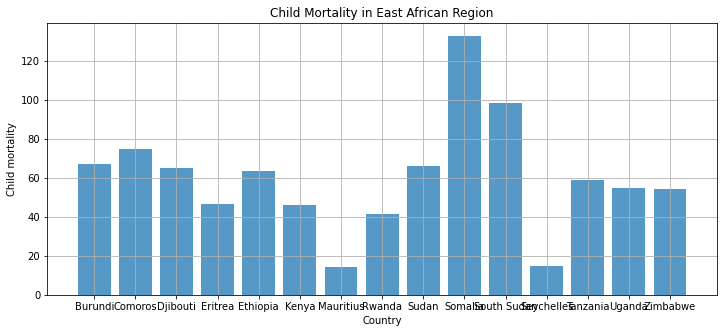

In [43]:
# 2015
plt.figure(figsize=(12,5))
plt.bar(pop_af.Country,pop_af['2015_cm'], alpha =0.75)
plt.xlabel('Country')
plt.ylabel('Child mortality')
plt.title('Child Mortality in East African Region')
plt.grid(True)



In 2015 Somalia experienced the highest child mortality rate while Sychelles maintained the lowest rate.

### 5. Which years and regions experienced the highest population growth?

In [174]:
#The maximum values were obtained
pg_df.max()

Country    Zimbabwe
1985_pg        4.71
1995_pg        3.33
2005_pg        4.37
2015_pg        3.85
dtype: object

Zimbabwe experienced the highest population growth with the highest in 1985.

<a id='conclusions'></a>
## Conclusions

### Results
The analysis fro the given data suggest that there was a general increase in the number of new births from 1985 to 2015.There was a high growth rate in 1985 which reduced in 1995. In 2005 and 2015 the rate is relatively at the same level.There has been a significant reduction in child mortality rate since 1985 to 2015.The number of childen per woman has been decreasing over the years.Child mortality appears to decrease with increase in population growth though it is a weak correlation.There is no clear pattern observed hence the two variables are not correlated.In 1985 South Sudan experienced the highest child mortality rate while Sychelles the lowest.In 2015 Somalia experienced the highest child mortality rate while Sychelles maintained the lowest rate.Zimbabwe experienced the highest population growth with the highest in 1985.

### Limitations
The data was very bulky with a lot of information and hence required more advanced techniques to inference the data.

References
1. FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE
2. Pandas.pydata.org
3. Basic Analytics in python by Michael Bydon
4. stackoverflow.com